### Import library

## 1. Data types

![](https://miro.medium.com/max/1200/0*tZj7CTvSzNcjnISR)

## 2. Classification vs Regression
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 3. Titanic dataset

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Sanity check

In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# nháp
len(titanic)

891

In [6]:
titanic.isna().sum()*100/len(titanic)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nhận thấy ở đây cột age là một trong những cột thiếu dữ liệu và phải tìm cách điền vào.
mô hình tuyến tính đều yêu cầu full dữ liệu, không có dữ liệu null hoặc categorical. 
những mô hình tuyến tính nếu xét trong cụm bài toán học máy có giám sát yêu cầu dữ liệu phân phối chuẩn

### Xử lý thông tin Age bị thiếu.

### Data Distribution check

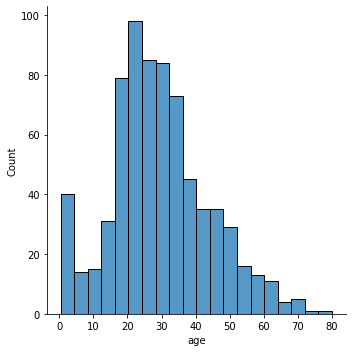

In [8]:
#Check Age distribution of 'age' columns
sns.displot(data=titanic, x ='age')
plt.show()

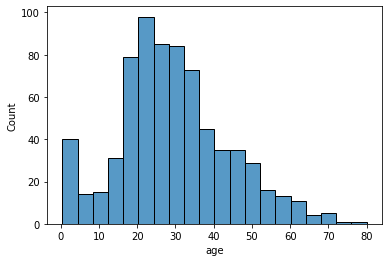

In [9]:
sns.histplot(titanic, x ='age')
plt.show()

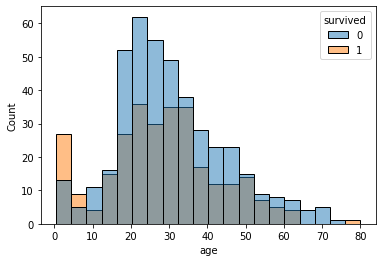

In [10]:
#check correlation between 'Age' and 'Survived'
sns.histplot(data=titanic, x='age', hue='survived')
plt.show()

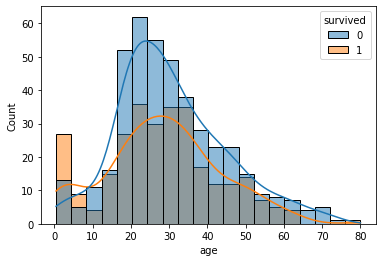

In [11]:
sns.histplot(data=titanic, x='age', hue ='survived', kde = True) # tham số kde để thêm đường cong ước tính mật độ hạt nhân
plt.show()

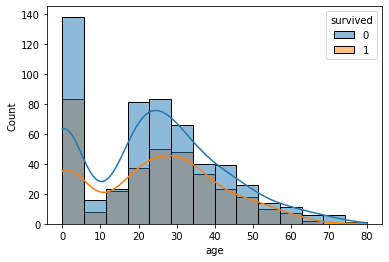

In [12]:
# mô hình tuyến tính đều yêu cầu full dữ liệu, không có dữ liệu null hoặc categorical. 
# if replate empty Age data by 0
sns.histplot(data=titanic[['age','survived']].fillna(0), x='age', hue='survived', kde=True)
plt.show()

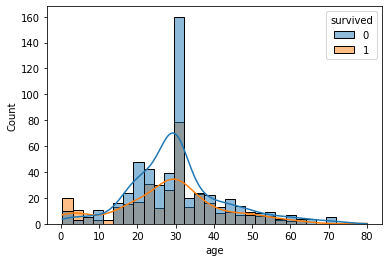

In [13]:
# Use data center tendency (xu hướng trung tâm dữ liệu): mean, median, mode 
# Try with mean() value with emtpy age data
sns.histplot(data=titanic[['age','survived']].fillna(titanic['age'].mean()), x='age', hue='survived', kde=True)
plt.show()

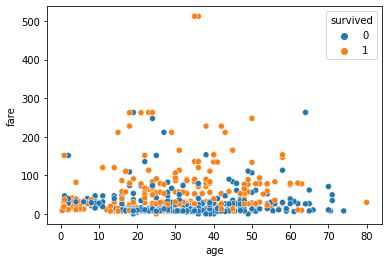

In [14]:
# Cách thay thế dữ liệu như trên thường thiếu đánh giá chuyên gia, mang tính mặc định cao.
# Hypothesis I: correlation between Age with Fare. the higher Price they paid, the more chance to survive => False
sns.scatterplot(data = titanic, x='age', y='fare', hue='survived')
plt.show()

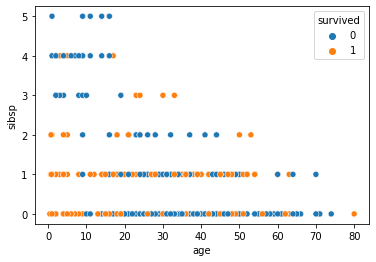

In [15]:
# Hypothesis II: Correlation between Age with sibsp
sns.scatterplot(data=titanic, x='age', y='sibsp', hue='survived')
plt.show()

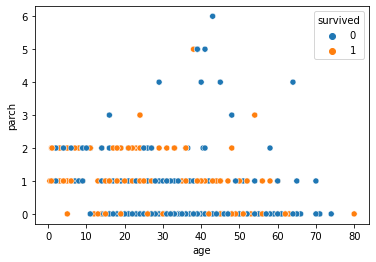

In [16]:
sns.scatterplot(data=titanic, x='age', y='parch', hue ='survived')
plt.show()

In [17]:
titanic['sibsp'].value_counts(), titanic['parch'].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: sibsp, dtype: int64,
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: parch, dtype: int64)

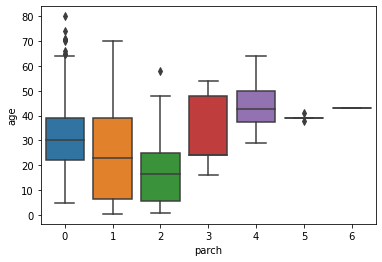

In [18]:
sns.boxplot(data=titanic, x= 'parch', y = 'age')
plt.show()

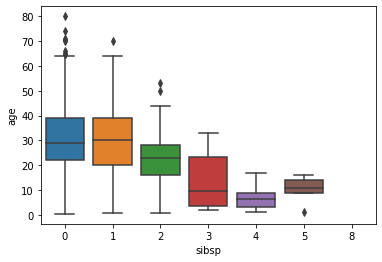

In [19]:
sns.boxplot(data=titanic, x= 'sibsp', y='age')
plt.show()

In [20]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [22]:
# độ tuổi trung bình của các cụm trọng cột who, sibpr, parch 
# vận dụng kiến thức chuyên môn để có thể điền vào các cụm dữ liệu domain expertize
# trong trường hợp này, có thể chia như sau.
# who | sibpr | parch | age.
# với giá trị who1, sibpr1, parch1 thì sẽ tính giá trị trung bình m1
# tương tự như thế n lần.
# gộp lại thành một bảng.
# một bảng mới sẽ gồm có với mỗi nhóm giá trị thì có độ tuổi trung bình là bao nhiêu.
# nếu như giá trị độ tuổi bị thất thoát, và nhóm giá trị who sibpr parch có trùng với nhóm của độ tuổi bị thất thoát, ta có thể điền giá trị trung bình vào.

In [23]:
titanic.groupby(['who', 'sibsp', 'parch']).age.mean()
#tìm giá trị trung bình độ tuổi dựa vào 'who', 'sibsp', 'parch'

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [24]:
# Ngoài ra ta có thể thêm vào một số cột như số lượng bản ghi, số % giá trị trống bằng cách sử dụng hàm lambda
titanic.groupby(['who','sibsp','parch']).age.agg([len,'mean', lambda x: (x.isnull().sum()/len(x)*100)])
#lệnh này sử dụng hàm lambda với x đại diện cho các giá trị who, sibsp và parch
#giá trị mean ở đây là giá trị tính theo từng cụm who sibsp, parch


len       mean  <lambda_0>
who   sibsp parch                            
child 0     0        6  12.166667    0.000000
            1        8   6.052500    0.000000
            2        9   4.981111    0.000000
      1     0        5  13.900000    0.000000
            1       15   4.566667    0.000000
            2        7   5.274286    0.000000
      2     1        5   2.300000    0.000000
            2        1   9.000000    0.000000
      3     1        3   4.333333    0.000000
            2        4   6.250000    0.000000
      4     1        8   5.625000    0.000000
            2        8   6.125000    0.000000
      5     2        4   8.750000    0.000000
man   0     0      410  32.973597   26.097561
            1       12  38.583333    0.000000
            2        5  35.800000    0.000000
      1     0       59  32.701923   11.864407
            1       21  36.000000    9.523810
            2        5  30.750000   20.000000
            3        1  16.000000    0.000000
            4        2  52.000000    0.000000
            5        1  39.000000    0.000000
      2     0       13  31.181818   15.384615
            1        1  23.000000    0.000000
      3     1        1        NaN  100.000000
            2        1  19.000000    0.000000
      4     1        1  16.000000    0.000000
      8     2        4        NaN  100.000000
woman 0     0      121  31.084211   21.487603
            1       18  34.176471    5.555556
            2       15  26.833333   20.000000
            3        1  24.000000    0.000000
            4        1  29.000000    0.000000
            5        2  40.000000    0.000000
      1     0       59  33.355556   23.728814
            1       21  35.450000    4.761905
            2        7  31.333333   14.285714
            3        2  51.000000    0.000000
            4        1  45.000000    0.000000
            5        2  38.500000    0.000000
            6        1  43.000000    0.000000
      2     0        3  35.500000   33.333333
            1        1  24.000000    0.000000
            2        3  20.000000    0.000000
            3        1  24.000000    0.000000
      3     0        2  31.500000    0.000000
            1        3        NaN  100.000000
            2        2  23.500000    0.000000
      4     2        1  17.000000    0.000000
      5     2        1  16.000000    0.000000
      8     2        3        NaN  100.000000

In [25]:
ser = titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
ser
# apply cho phép thực hiện hàm lambda dọc theo trục của DataFrame
# ý nghĩa là tạo Series 'ser' lưu trữ các giá trị cũ của 'age' và fillna bằng giá trị trung bình của tuổi dựa dựa theo 'who', 'sibsp', 'parch'

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [26]:
titanic['age'] = ser
#gán ser vào cột age trong bảng

In [27]:
#kiểm tra lại xem cột 'age' còn trống bao nhiêu thông tin nữa
titanic['age'].isnull().sum()

11

In [28]:
ser = titanic.groupby(['sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
titanic['age'] = ser
titanic.age.isnull().sum()

7

In [29]:
#check lại thông tin giữa 'sibsp' ,'parch'
titanic.groupby(['sibsp', 'parch']).age.agg([len, 'mean', lambda x: x.isnull().sum()*100/len(x)])

len       mean  <lambda_0>
sibsp parch                            
0     0      537  32.315390         0.0
      1       38  29.647276         0.0
      2       29  21.597586         0.0
      3        1  24.000000         0.0
      4        1  29.000000         0.0
      5        2  40.000000         0.0
1     0      123  32.251148         0.0
      1       57  27.525439         0.0
      2       19  21.579123         0.0
      3        3  39.333333         0.0
      4        3  49.666667         0.0
      5        3  38.666667         0.0
      6        1  43.000000         0.0
2     0       16  31.991477         0.0
      1        7   8.357143         0.0
      2        4  17.250000         0.0
      3        1  24.000000         0.0
3     0        2  31.500000         0.0
      1        7   4.333333         0.0
      2        7  13.000000         0.0
4     1        9   6.777778         0.0
      2        9   7.333333         0.0
5     2        5  10.200000         0.0
8     2        7        NaN       100.0

ở trường hợp trên có 7 giá trị đang bị thất thoát là những người mà có đi cùng với 8 anh chị em và 2 người lớn.</br>
sác xuất ở đây 7 người này sẽ có khả năng là những người trẻ </br>
khá khó có thể tìm thấy 9 người trong cùng một gia đình đi trên cùng một chuyến tàu. --> xác suất thấp. </br>
nếu như mình coi đây là những người trẻ thì giá trị độ tuổi có thể gán cho 7 giá trị này là giá trị trung bình của những người trẻ tuổi. </br>

In [30]:
kid_avg_age = titanic[titanic['who']=='child'].age.mean()
#lọc theo cột who = child tính giá trị trung bình cột độ tuổi.

In [31]:
#fillna giá trị độ tuổi trung bình của child vào các giá trị na còn lại
titanic['age'] = titanic.age.fillna(kid_avg_age)

In [32]:
# kiểm tra lại giá trị trống
titanic['age'].isnull().sum()

0

## Xử lý thông tin cột Embarked

In [33]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [34]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
titanic['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [36]:
titanic[titanic['embarked'].isnull()] #lọc ra những dòng có embarked = null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [37]:
#lọc người có giới tính nữ, sống sót, thương gia, xem họ xuất phát từ cảng nào. và nếu cảng nào có giá trị xuất hiện nhiều nhất thì điền giá trị đó vào giá trị trống này.

#cách1
filter1 = (titanic['survived']==1)
filter2 = (titanic['pclass']==1)
filter3 = (titanic['sex']=='female')
filter4 = (titanic['sibsp']==0)
filter5 = (titanic['parch']==0)

titanic[filter1 & filter2 & filter3 & filter4 & filter5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [38]:
# cách 2 dùng hàm query
ser = titanic.query("survived == 1 and pclass ==1 and sex == 'female' and sibsp ==0  and parch==0")
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [39]:
ser['embarked'].value_counts().idxmax()
#có thể dùng mode để tính giá trị nhiều nhất 
# ser['embarked'].mode()

'C'

In [40]:
titanic['embarked'] = titanic['embarked'].fillna('C')

In [41]:
titanic['embarked'].isna().sum()

0

In [42]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý thông tin cột Deck

xử lý mất mát với dữ liệu có 2 cách
Cách 1 Direct: không cần phải xử lý gì với cột dữ liệu đó mà truyền thẳng vào trong mô hình. mô hình đó hỗ trợ việc xử lý dữ liệu thất thoát (decision tree, random forest..)

Cách 2 Indirect: thông thường cách này sẽ dành cho những thuật toán mà không có cơ chế để xử lý việc thất thoát dữ liệu.
* Có thể remove luôn cột dữ liệu đang bị thiếu - hãn hữu sử dụng cách này.
* Nếu không loại bỏ được. thì phải tìm cách thay thế dữ liệu hoặc điền vào dữ liệu (impute)
* Khi điền giá trị chúng ta có thể sử dụng các giá trị mean, median, mode,... điền các giá trị scaler hoặc hằng số nào đấy. --> fillna()
* Kết hợp hành vi của những cụm feature lân cân, và từ những hành vi đó có thể đưa ra kết luận với từng giá trị bị thất thoát. (domain expertise)
* Dựa vào mô hình khác để dự đoán giá trị thất thoát đó là bao nhiêu (1-nn)

Cách thứ 2 thồng thường sẽ sử dụng hành vi kết hợp với cụm feature hoặc dựa vào mô hình học máy khác (3,4) để làm nhiều hơn.


In [43]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.pivot_table(index='deck', 
                    columns='pclass',
                    values = 'survived',
                    aggfunc='count'
                    )

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


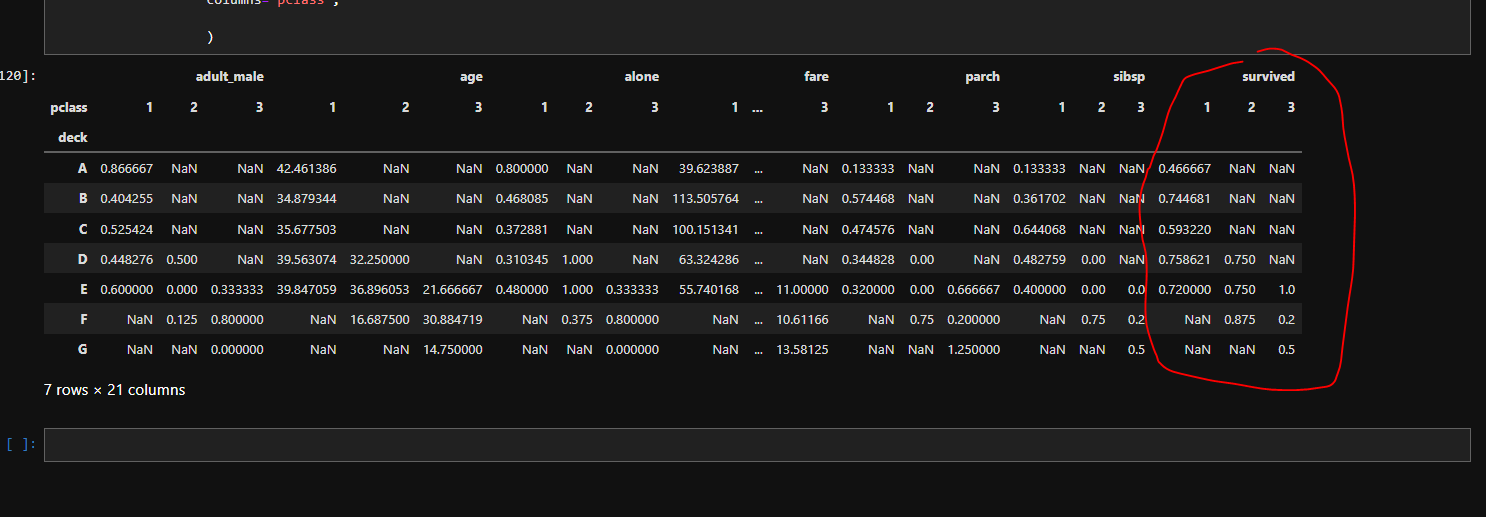

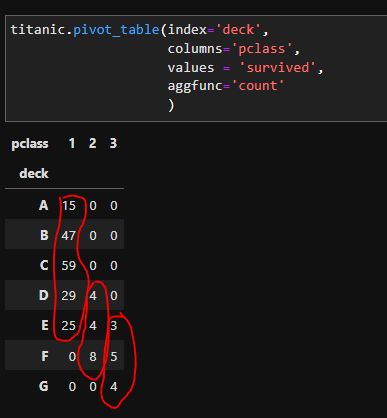</br>
Nhận thấy rằng ở đấy 1st class sẽ luôn tập trung ở khoang A,B,C,D và các vé hạng 2 sẽ luôn tập trung ở D,E,F. vé hàng 3 luôn tập trung ở E,F,G

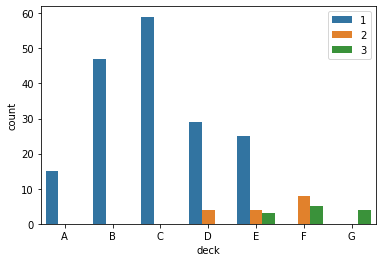

In [45]:
sns.countplot(data=titanic, x='deck', hue = 'pclass')
plt.legend(loc='upper right')
plt.show()

In [46]:
# Hypothesis
# Nếu như người nào có pclass = 1 thì sẽ gán ở giá trị C
# Nếu như người nào có pclass = 2 hoặc 3 thì sẽ gán giá trị F
deck_dict = {1: 'C', 2: 'F', 3: 'F'}
ser = titanic['pclass'].map(deck_dict)
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [47]:
# Gán giá trị từ ser vào trong cột deck. nếu như deck có giá trị rồi thì bỏ qua và chỉ thay thế với na bằng ô tương ứng bên ser
# combine_first tương tự vòng lặp for, nhưng chỉ áp dụng khi qua các vòng lặp có giá trị null.
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [48]:
titanic['deck'].isnull().sum()

688

In [49]:
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [50]:
titanic['deck'] = titanic['deck'].fillna(ser)

In [51]:
titanic['deck'].isna().sum()

0

In [52]:
titanic['deck'].value_counts()

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [53]:
titanic.isna().sum()
#Trong bảng dưới đây ta thấy embarked và embarked town có giá trị sử dụng tương đương như nhau. do vậy có thể bỏ cột embark_town đi được.

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

Các bước xử lý dữ liệu </br>
DATA --> EDA --> Feature Engineering --> Feature Selection --> model</br>

* EDA: Exploratory Data Analysis - nghiên cứu dữ liệu </br>
* Feature Engineering: làm sạch dữ liệu, lọc nhiễu và điền thêm dữ liệu, tạo các bộ biến cần thiết, có ý nghĩa, feature scaling hay feature normalization.
* Feature Selection: lựa chọn Feature có ý nghĩa để đưa vào mô hình.


## Feature Engineering

1. Thêm cột dữ liệu được phân loại

Thông thường với độ tuổi thì hay được phân cụm và nhóm lại. và có một cụm từ để mô tả </br>
**Discretization**
- Đối với bài toán **Supervised** có 2 cách để tiếp cận:
    - Equal-width discretization:  chia các giá trị thành các nhóm bằng nhau, sử dụng hàm `pd.cut()`
    - Equal-frequent discretization sử dụng hàm `pd.qcut()`
- Đối với bài toán **Unsupervised** tiếp cận bằng cách:
    - Entropy-base discretization


In [54]:
titanic.age.describe()

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [55]:
age_group=[0, 15,25,35,45,60,80,100]
pd.cut(titanic.age, bins= age_group)
#phân khoảng nhóm

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [56]:
titanic['age_group'] = pd.cut(titanic.age, bins= age_group)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"


In [57]:
# Hypothesis: liệu rằng những người phụ nữ giàu có có khả năng sống sót cao?
# titanic['rich_women'] lọc theo kiểu: sử dụng vé hạng sang, và phải là phụ nữ
titanic['rich_women'] = (titanic['sex'] == 'female') & (titanic['pclass'] == 1)
titanic['rich_women']

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: rich_women, Length: 891, dtype: bool

In [58]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

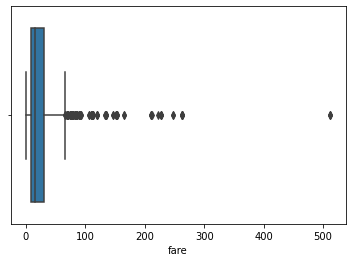

In [59]:
sns.boxplot(data=titanic, x='fare')
plt.show()

**BÀI TẬP: Note: Practice Feature scaling with `fare` **

2. Thay đổi các cột dữ liệu dạng string thành dạng numeric, phục vụ các mô hình chỉ sử dụng được dữ liệu dạng numeric như regression.

**tHỰC HIỆN Numeric dữ liệu categorical tại cột SEX**

In [60]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,rich_women
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False


In [61]:
#Biến đổi dữ liệu
# map biến đổi male = 0, female =1 
#sex_dict={'male': 0, 'female': 1}
#titanic[''] = titanic['sex'].map(sex_dict)

In [62]:
titanic.drop(columns=[''])

KeyError: "[''] not found in axis"

In [ ]:
titanic['sex']=titanic['sex'].map({'male': 0, 'female': 1})
titanic.head(5)

In [ ]:
# Ngoài việc sử dụng hàm map thì còn có thể sử dụng hàm equal `eq`. Với hàm eq, nếu 'sex' là femail  thì sẽ trả về true, còn lại sẽ là false
# lưu ý: 'eq' này sẽ không lưu trong data ban đầu. 
# cấu trúc này có thể giống trong pyspark
titanic['sex'] = titanic['sex'].eq('female')\
                               .astype(int)  # lệnh này để ép kiểu từ true, false sang integer.

In [ ]:
titanic.head(5)

**THực hiện numeric đối với dữ liệu dạng categorical của cột DECK**

In [ ]:
titanic.deck.value_counts()
# thực hiện gộp nhóm rời rạc "sparse class grouping". 

In [ ]:
ser = titanic['deck'].map({'A': 1,
                          'B':1,
                          'C':1,
                          'D':0,
                          'E':0,
                          'F':0,
                          'G':0})
ser
# map luôn đi kèm với dữ liệu dạng dictionary.
# Căn cứ visualization về việc phân bố deck và hạng vé ở trước đó, khoang A, B, C thường mua vé vip. Các khoang còn lại, thường mua vé thường. Vì vậy;  phân hàng a,b,c là hạng 1, d, e, f, g là hạng 0

In [ ]:
titanic['new_deck'] = ser

In [ ]:
titanic.head(5)

**thực hiện numeric các cột 'adult_male','alone','rich_women**

In [ ]:
# Boolean into int
for col in ['adult_male','alone','rich_women']:
    titanic[col] = titanic[col].astype(int)
titanic

**
Một số thuật toán dòng regresion có thể chấp nhận số liệu dạng khoảng; nhưng thuật toán như xgboost, sẽ không nhận dữ liệu như vậy

In [ ]:
#sử dụng erplace() hoặc strip() để biến đối từ (25,35] thành dạng 25_35
titanic['age_group']=titanic['age_group'].astype(str).str.strip('([])').str.replace(', ','_')
titanic['age_group']

In [ ]:
#tạo ra các cột dữ liệu dummie
dummies = pd.get_dummies(titanic[['age_group','embarked','who']])
dummies

In [ ]:
#join 2 bảng titanic và dummies
titanic_new = titanic.join(dummies) # có thể sử dụng hàm merge(on=, how=) như đã học tại python1
titanic_new

### Train model

In [ ]:
#loại bỏ các cột dữ liệu mà mình không cần nữa, là những cột đã được numeric từ dữ liệu string. 
titanic_new.columns

In [ ]:
titanic_new = titanic_new.drop(columns=['sex','age','fare','age_group','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive','alone'])
titanic_new.head(5)

In [ ]:
# các bước xây dựng mô hình trong classification tương tự như linear regression.
from sklearn.model_selection import train_test_split
x_data = titanic_new.drop(columns=['survived'])
y_data = titanic_new['survived']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

In [ ]:
y_test.to_list()[:20]

**đánh giá mô hình (evaluation metrics) **
- Các phương pháp: accuracy, precision, Recall, F1 score.
- accuracy=(true negative+true positive)/true negative+true positive+false negative+false positive
- precision ( = tp/tp+fp
- recall (true positive rate, hit rate, sensibility):tp/tp+fn
- f1 score:1/2(precison*recall)/(precision+recall)

In [ ]:
# để so sánh y_pred và y_test có giống nhau hay không: 
(y_pred==y_test).sum()/len(y_test)

In [ ]:
# việc so sánh này có thể thực hiện bằng hàm accuracy. Hầu hết những cái hàm đánh giá chất lượng mô hình HẦU HẾT đều nằm trong thư viện sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
confusion_matrix(y_pred, y_test)
# kết quả trả về là array, số chiều của array tương đương số kết quả của label. 

In [ ]:
import numpy as np
cf_matrix= confusion_matrix(y_pred, y_test)
name=['true negative', 'false positive', 'false negative', 'true positive'] # để gắn tên vào các ô
labels=np.asarray([f'{i}\n\n\{j}'for i, j in zip (name, cf_matrix.flatten())]) # taị bước này, kết quả ra là một ma trận 1x4, 1 dòng 4 cột
sns.heatmap(cf_matrix,annot=labels.reshape(2,2),fmt='') # reshape để đưa ma trận từ 1x4 về 2x2 tương tự heatmap
plt.show(0)
# kết quả sau khi chạy ra: cột đứng là y_test, ngang là y_predict, cột màu trắng, đỏ là true positve, true negative; các cột màu đen là fall positive và fall negative

In [ ]:
cf_matrix= confusion_matrix(y_test,y_pred)
names=['true negative', 'false positive', 'false negative', 'true positive'] 
labels=np.asarray([f'{i}\n\n\{j}'for i, j in zip (names, cf_matrix.flatten())]) 
sns.heatmap(cf_matrix) 
plt.show(0)

In [ ]:
classification_report(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred)) # để cho dễ nhìn hơn, dùng thêm hàm  print

## nén mô hình để áp dụng nhanh chóng cho các dữ liệu mới ##
- Nội dung: nén mô hình đã huấn luyện, lưu nó lại. KHi có dữ liệu mới thì sẽ áp dụng vào mô hình đó để predict. Điều này giúp tiết kiệm time. 
- Khi nào thực hiện: xong feature engineering hoặc đã có model, 
- Các cách lưu: 
    + học nông (shallow learning): pickle, jopblib đều lưu trữ dữ liệu dưới dạng nhị phân
    + deep learning: .h5, .hdfs5

In [ ]:
#học nông (shallow learning): pickle, jopblib
# deep learning: .h5, .hdfs5

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() # bước này là đã lưu trữ mô hình (hàm) logistic regression vào clf. 

In [ ]:
clf.fit(x_train,y_train) # bước này fit dữ liệu, tức là đã có 1 mô hình

In [ ]:
# Lưu bằng pickle: sau khi đã có mô hình LogisticRegression này, thì có thể lưu vào máy local bằng cách: 
import pickle as pkl
pkl.dump(clf, open('lan_saved_model.pkl','wb')) # wb (write binary) là tham số để yêu cầu lưu trữ dưới dạng nhị phân

In [ ]:
# để gọi model đã được lưu:
loaded_model= pkl.load(open('lan_saved_model.pkl','rb'))
loaded_model

In [ ]:
# cho chạy mô hình như bình thường
y_pred=loaded_model.predict(x_test)
y_pred

In [ ]:
# evaluation mô hình như bình thường
print(classification_report(y_test,y_pred))

In [ ]:
# lưu bằng joplist: thời gian nén, độ nén tốt hơn pickle do joblib sinh ra sau pickle
import joblib
joblib.dump(clf,'lan_saved_model1.joblib')

In [ ]:
loaded_model1=joblib.load('lan_saved_model1.joblib')

In [ ]:
y_pred=loaded_model1.predict(x_test)
print(classification_report(y_test,y_pred))

## pipeline
- Trong thực tế, mỗi khi có dữ liệu test/dữ liệu mới truyền vào, thì đều phải thực hiện các bước xử lý dữ liệu (processing), bao gồm: xử lý missing value, normalization/scalde dữ liệu, feature engineering.(1) SAu đó truyền huấn luyện (fit) dữ liệu training vào mô hình (2); rồi mới predict. 
- pipeline giúp định nghĩa với 1 mô hình, thì sẽ thực hiện những bước nào. 
- pipeline dùng cho học máy có giám sát. 

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
titanic=sns.load_dataset('titanic')
titanic.head(5)

In [ ]:
# như các bước ở trên, thì sẽ xử lý dữ liệu rồi mới chia ra train, test.
# ở đây sẽ dùng luôn việc chia train, test khi dữ liệu chưa được process;
from sklearn.model_selection import train_test_split
training_data=titanic[['embarked','sex', 'pclass','age','survived']]
X_data, Y_data=training_data.drop(columns=['survived']), training_data['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=42, test_size=0.2) # range tu 0.15 den 0.3. dep nhat la 0.2

In [ ]:
training_data.head(5)

In [ ]:
training_data.isnull().sum()

In [ ]:
# xử lý dữ liệu missing bằng imputer trong sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn. preprocessing import OneHotEncoder, RobustScaler # onehotencoder để đưa dữ liệu về dạng 1_hot encode (nhị phân), còn robustscaler để scaler dữ liệu. 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# gom các cột dữ liệu dạng catagorical vào: 
cat_cols=['embarked', 'sex']
# truyền các tút vào pipeline, mỗi một tút sẽ nằm trong ngoặc tròn. 
cat_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),  # tại strategy nhập vào loại mà muốn thay thế cho dữ liệu null, như: mode, mean, 0,1,....
    ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))# handle_unknown='ignore': nếu có dữ liệu null, unknown thì sẽ không ảnh hưởng đến việc xử lý; Sparse để dữ liệu trả về là thưa hay không
])
# xu ly du lieu dang so:
num_cols=['age']
num_transformer=Pipeline(steps=[
    ('imputer',KNNImputer(n_neighbors=5)),  # KNNIMputer có thể fill các giá trị null bằng các giá trị lân cận. 
    ('scaler',RobustScaler())])# các tham số khác trong hàm này: handle_unknown='ignore': nếu có dữ liệu null/unknown thì sẽ không ảnh hưởng đến việc xử lý; Sparse để dữ liệu trả về là thưa hay không

In [ ]:
preprocessor=ColumnTransformer(transformers=[('num',num_transformer,num_cols),('cat',cat_transformer,cat_cols)])

In [ ]:
# gọi mô hình lên bằng cách gọi pipeline
full_pipeline = Pipeline(steps=[('preprocess',preprocessor),
                              ('classifier',RandomForestClassifier())])

In [ ]:
full_pipeline.fit(X_train,Y_train)
# bình thường với các mô hình như linear regression, logisticregression thì sau bước này sẽ trả ra: LinearRegression() hoặc LogisticRegression()
# khi dùng pipeline, 

In [ ]:
X_test.head(5)

In [ ]:
y_pred=full_pipeline.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))